# Machine Learning Notes: Classification with K Nearest Neighbors


Notes for https://www.youtube.com/playlist?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

## Video 13: Classification w/ K Nearest Neighbors Intro

## Video 14: K Nearest Neighbors Application

In [131]:
import numpy as np 
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [105]:
#download the file and save it as txt.
# add headers to it. Do NOT add space between names

df = pd.read_csv('breast-cancer-wisconsin.data.txt')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
unif_cell_size            699 non-null int64
unif_cell_shape           699 non-null int64
marg_adhesion             699 non-null int64
single_epith_cell_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chrome              699 non-null int64
norm_nucleoli             699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [107]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrome,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [109]:
df.isin(['?']).sum() ## Me added

id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marg_adhesion              0
single_epith_cell_size     0
bare_nuclei               16
bland_chrome               0
norm_nucleoli              0
mitoses                    0
class                      0
dtype: int64

In [111]:
df.loc[df.bare_nuclei=='?']  # me added. find the rows where '?' exist

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrome,norm_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [112]:
df.replace('?', -99999, inplace= True)

In [113]:
df.drop(['id'], 1, inplace=True) #remove id column, id col is very bad for nearest neighbor

In [114]:
X = np.array(df.drop(['class'], 1))

In [115]:
y = np.array(df['class'])

In [116]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [133]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.978571428571


In [140]:
X[0]

array([5, 1, 1, 1, 2, '1', 3, 1, 1], dtype=object)

In [134]:
example_measures = np.array([4,2,1,1,1,2, 3,2,1])

In [136]:
prediction = clf.predict(example_measures)
print(prediction)

[2]


/Users/JingXia/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [141]:
#to remove the depreciation error, do this:
example_measures = example_measures.reshape(1,-1)

In [142]:
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [148]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,2,1,1,2,3,2,1]]) #list of list

example_measures = example_measures.reshape(len(example_measures),-1) #rather than hardcode it, use len() to reshape it
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


## Video 15: Euclidean Distance

In [149]:
from math import sqrt

In [150]:
plot1 =[1,3]
plot2 =[2,5]

euclidean_distance = sqrt ((plot1[0] - plot2[0])**2 + (plot1[1]-plot2[1])**2)
print(euclidean_distance)

2.23606797749979


## Video 16: Creating our own K Nearest Neighbors Alogorithm

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
style.use('fivethirtyeight')

In [152]:
dataset= { 'k': [ [1,2],[2,3],[3,1]], 'r': [[6,5], [7,7], [8,6]]}
new_features =[5, 7]

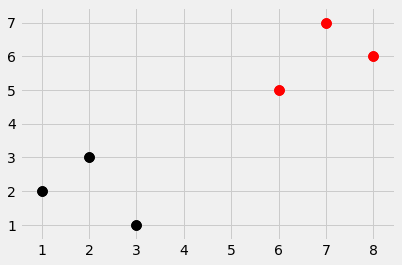

In [154]:
[[plt.scatter(ii[0], ii[1], s=100, color =i) for ii in dataset[i]] for i in dataset]
plt.show()

In [155]:
def k_nearest_neighbors (data, predict, k =3):
    if len(data) >= k:
        warnings.warn('k is set to a value less than total voting groups!')
    knnalgos
    return vote_result

## Video 17: Writing our our K Nearest Neighors in Code

In [200]:
def k_nearest_neighbors (data, predict, k =3):
    if len(data) >= k:
        warnings.warn('k is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            #compute the euclidean distance
            euclidean_dsitance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes =[i[1] for i in sorted(distances)[:k]]  ##only the top n euclidean distances are of interest
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

In [161]:
result = k_nearest_neighbors(dataset, new_features, k=3)

[('k', 3)]


In [162]:
print(result)

k


## Video 19 Final Thought on K Nearest Neighors

In [330]:
# Notes of this video is based on last one, so they are all presented together

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
#dont forget this
import pandas as pd
import random
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]] 
    
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1]/k
    return vote_result, confidence


df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))] 
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])
    
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1 
        
print('Accuracy: ', correct/total)


0.6
1.0
0.8
0.6
0.8
0.6
Accuracy:  0.9568345323741008


### Summary
Nearest neighbor can work linear and non-linear data
  
  
  N-jobs = -1, the function k_nearest_neighbors can run multiple jobs at the same time.
  
  
  The inherent K nearest neighbor algo has similar accuracy to this one but prob runs faster on large dataset